In [1]:
# Imports needed for Exercise 5
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random

In [3]:
# We read the raw data and convert them into a list of 3-Tuples reffered as data
with open('dataCircle.txt') as f:
    read_data = f.read()
f.close()
#raw_data = [data_line.rstrip().split() for data_line in read_data ]
#data = [tuple(map(lambda x: float(x), line)) for line in raw_data]

In [4]:
read_data_string = read_data.split('\r')
data_circle_string= list(map(lambda x: x.split(), read_data_string))

In [5]:
data_circle = []
for liste in data_circle_string:
    data_circle.append(list(map(lambda x: float(x), liste)))
    if data_circle[-1][2] == 0.0:
        data_circle[-1][2] = -1.0

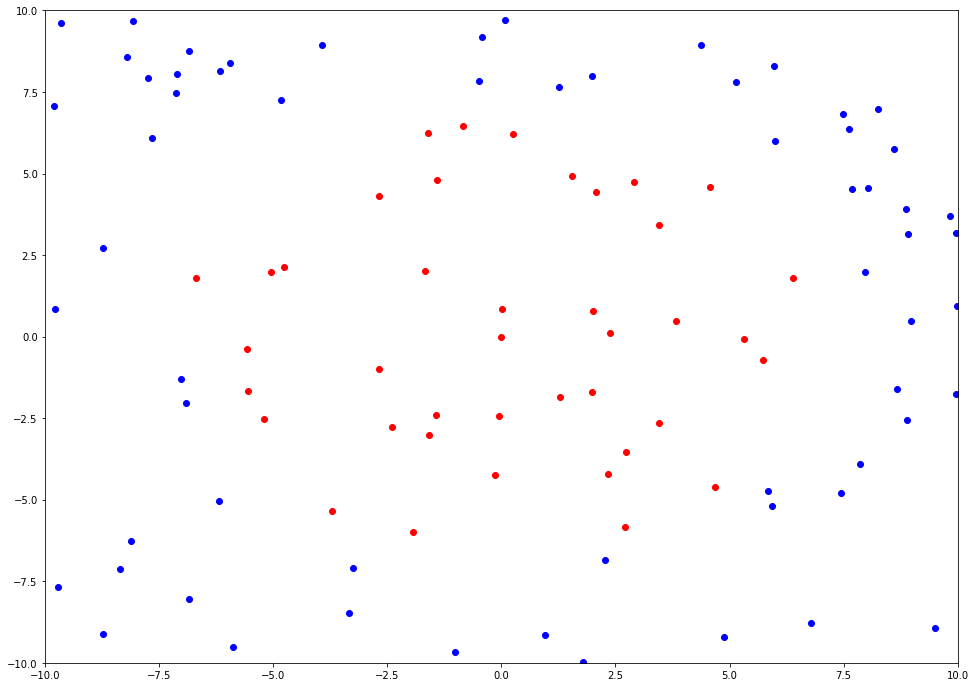

In [6]:
# We made sure that we got the right representation of the Data by comparing it to the erxercise sheet
#% matplotlib
fig = plt.figure(figsize=(36,12))
ax1 = fig.add_subplot(121)
ax1.plot([data_x[0] for data_x in data_circle[0:40]], [data_y[1] for data_y in data_circle[0:40]], "ro")
ax1.plot([data_x[0] for data_x in data_circle[40:]], [data_y[1] for data_y in data_circle[40:]], "bo")
ax1.axis([-10, 10, -10, 10])

plt.show()

In [7]:
def get_weak_classifier(data):
    axis = random.choice([0, 1])
    val = random.uniform(-10, 10)
    corrects = 0
    faults = 0
    for point in data:
        if point[axis] < val and point[2] == 1:
            corrects += 1
        elif point[axis] >= val and point[2] == -1:
            corrects += 1
        else:
            faults += 1
    
    if corrects > faults:
        return [lambda point: 1.0 if point[axis] < val else -1.0, axis, val,  corrects/float(len(data))]
    else:
        return [lambda point: -1.0 if point[axis] < val else 1.0,  axis, val,  faults/float(len(data))]
    

In [41]:
def error_of_weak_classifier(distribution, data, classifier):
    result = 0
    for index in range(len(data)):
        if classifier[0](data[index]) != data[index][2]:
            result += distribution[index]
    return result

In [9]:
def update_distribution(distribution, data, classifier):
    #print(error_of_weak_classifier(distribution, data, classifier))
    alph = alpha(error_of_weak_classifier(distribution, data, classifier))
    for i in range(len(data)):
        distribution[i] = 1/float(z(distribution, data, alph, classifier)) * distribution[i] * m.exp(-alph * data[i][2] * classifier[0](data[i]))
    return distribution

In [10]:
def z(distribution, data, alpha, classifier):
    corrects = []
    faults = []
    for i in range(len(data)):
        if classifier[0](data[i]) == data[i][2]:
            corrects.append([data[i], i])
        else:
            faults.append([data[i], i])
    sum1 = 0
    for point in corrects:
        sum1 += distribution[point[1]]*m.exp(-alpha)
    sum2 = 0
    for point in faults:
        sum2 += distribution[point[1]]*m.exp(alpha)
    return sum1 + sum2
    

In [11]:
def alpha(error):
    return 0.5 * m.log((1-error)/float(error))

In [12]:
def ada_boost(list_of_classifiers, data):
    distribution = [1/float(len(data)) for i in range(len(data))]
    error_list=[]
    for i in range(100):
        error_list = list(map(lambda x: error_of_weak_classifier(distribution, data, x), list_of_classifiers))
        min_error_classifier_index = error_list.index(min(error_list))
        distribution = update_distribution(distribution, data, list_of_classifiers[min_error_classifier_index])
    result = []
    for i in range(len(error_list)):
        result.append([alpha(error_list[i]), list_of_classifiers[i]])
    return result

In [121]:
def classify(point, strong_classifier):
    result = 0
    for weighted_classifier in strong_classifier:
        result += weighted_classifier[0]*weighted_classifier[1][0](point)
    print(np.sign(result))  
    if np.sign(result) < 0:
        return -1
    else:
        return 1

In [117]:
list_of_cla = [get_weak_classifier(data_circle) for i in range(500)]
classifiers = ada_boost(list_of_cla, data_circle)

In [120]:
for point in data_circle:
    print(classify(point, classifiers))
    

-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
